In [55]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label = True)

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size // batch_size, 1)

#hyperparameters

iters_num = 10000 #반복 횟수
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1', 'W2', 'b1', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    train_loss_list.append(network.loss(x_batch, t_batch))
    
    if i%iter_per_epoch == 0 :
        train_acc_list.append(network.accuracy(x_train, t_train))
        test_acc_list.append(network.accuracy(x_test, t_test))

Text(0,0.5,'accuracy')

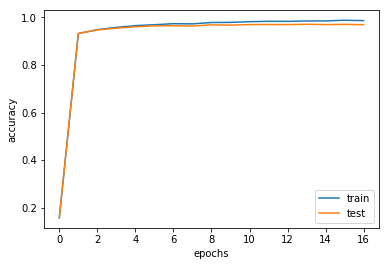

In [51]:
plt.plot(range(iters_num//iter_per_epoch + 1), train_acc_list, label = 'train')
plt.plot(range(iters_num//iter_per_epoch + 1), test_acc_list, label = 'test')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')

Text(0,0.5,'accuracy')

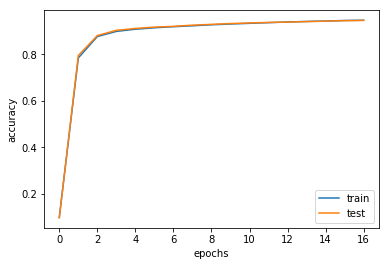

In [53]:
plt.plot(range(iters_num//iter_per_epoch + 1), train_acc_list, label = 'train')
plt.plot(range(iters_num//iter_per_epoch + 1), test_acc_list, label = 'test')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')

Text(0,0.5,'accuracy')

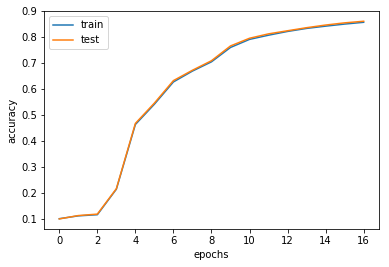

In [56]:
plt.plot(range(iters_num//iter_per_epoch + 1), train_acc_list, label = 'train')
plt.plot(range(iters_num//iter_per_epoch + 1), test_acc_list, label = 'test')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')